<a href="https://colab.research.google.com/github/denistoo749/Parents-heights-vs-children-heights/blob/main/parents_heights_vs_children_heights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parents heights vs children heights (Galton data)
## All Datasets for Practicing ML

In [53]:
# Unzip file
#!unzip '/content/drive/MyDrive/Parents heights vs children heights (Galton data)/archive.zip' -d '/content/drive/MyDrive/Parents heights vs children heights (Galton data)/data'

# Setup

In [54]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

In [55]:
# Read the data
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Parents heights vs children heights (Galton data)/data/GaltonFamilies.csv')
data.head()

,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownames         934 non-null    int64  
 1   family           934 non-null    object 
 2   father           934 non-null    float64
 3   mother           934 non-null    float64
 4   midparentHeight  934 non-null    float64
 5   children         934 non-null    int64  
 6   childNum         934 non-null    int64  
 7   gender           934 non-null    object 
 8   childHeight      934 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


In [57]:
data.isna().sum()

rownames           0
family             0
father             0
mother             0
midparentHeight    0
children           0
childNum           0
gender             0
childHeight        0
dtype: int64

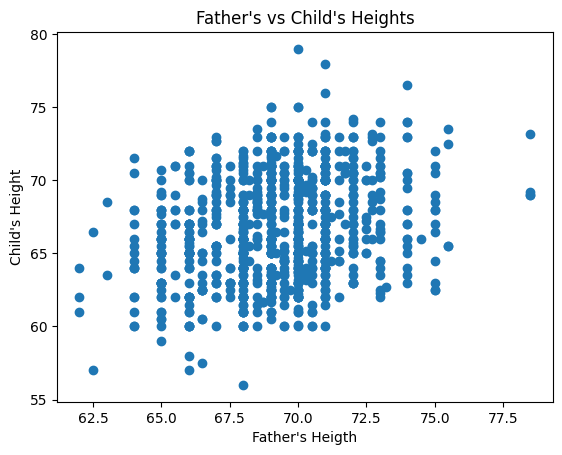

In [58]:
fig, ax = plt.subplots()
ax.scatter(data['father'], data['childHeight'])
ax.set_xlabel('Father\'s Heigth')
ax.set_ylabel('Child\'s Height')
ax.set_title('Father\'s vs Child\'s Heights')
plt.show();

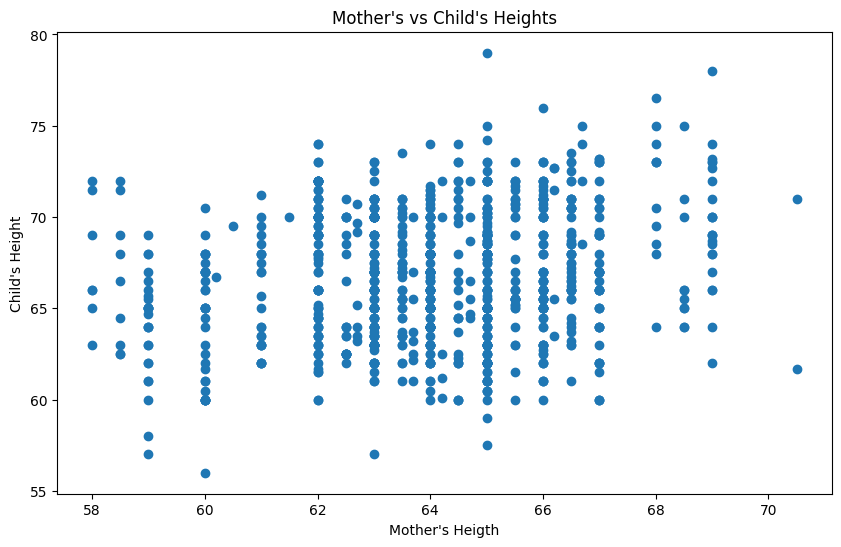

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data['mother'], data['childHeight'])
ax.set_xlabel('Mother\'s Heigth')
ax.set_ylabel('Child\'s Height')
ax.set_title('Mother\'s vs Child\'s Heights')
plt.show();

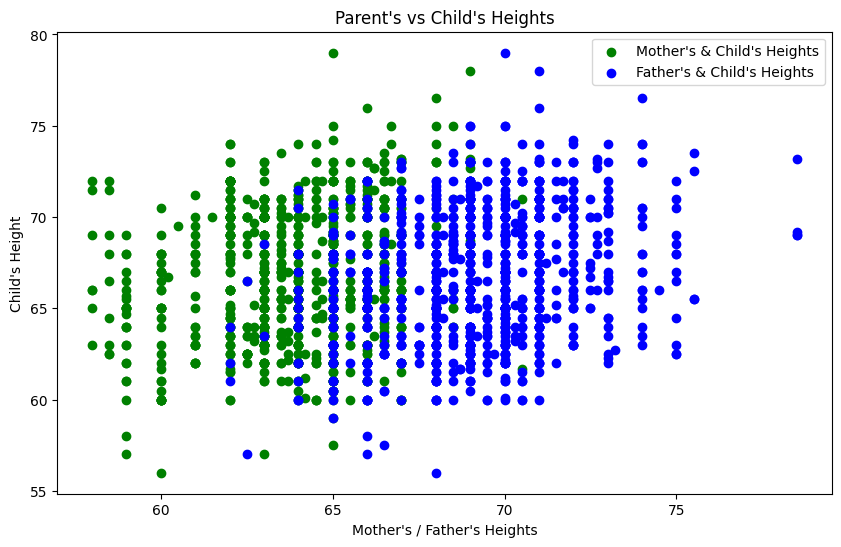

In [90]:
plt.figure(figsize=(10, 6))

# Scatter with Mother's Height and Child's Height
plt.scatter(data['mother'], data['childHeight'], c='green')

# Scatter with Father's Height and Child's Height
plt.scatter(data['father'], data['childHeight'], c='blue')

# Add some helpful information
plt.legend(['Mother\'s & Child\'s Heights', 'Father\'s & Child\'s Heights'])
plt.xlabel('Mother\'s / Father\'s Heights')
plt.ylabel('Child\'s Height')
plt.title('Parent\'s vs Child\'s Heights')
plt.show();

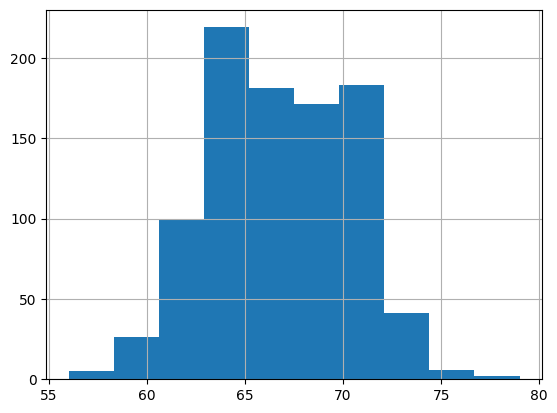

In [61]:
data['childHeight'].hist();

In [62]:
data.head().T

,0,1,2,3,4
rownames,1,2,3,4,5
family,001,001,001,001,002
father,78.5,78.5,78.5,78.5,75.5
mother,67.0,67.0,67.0,67.0,66.5
midparentHeight,75.43,75.43,75.43,75.43,73.66
children,4,4,4,4,4
childNum,1,2,3,4,1
gender,male,female,female,female,male
childHeight,73.2,69.2,69.0,69.0,73.5


## Make a copy of the original DataFrame

In [63]:
df = data.copy()
df.head()

,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


# Data Preprocessing

In [64]:
# This will turn all the string value into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   rownames         934 non-null    int64   
 1   family           934 non-null    category
 2   father           934 non-null    float64 
 3   mother           934 non-null    float64 
 4   midparentHeight  934 non-null    float64 
 5   children         934 non-null    int64   
 6   childNum         934 non-null    int64   
 7   gender           934 non-null    category
 8   childHeight      934 non-null    float64 
dtypes: category(2), float64(4), int64(3)
memory usage: 63.8 KB


In [66]:
# Check for columns which aren't numeric and convert them to numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes+1

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownames         934 non-null    int64  
 1   family           934 non-null    int16  
 2   father           934 non-null    float64
 3   mother           934 non-null    float64
 4   midparentHeight  934 non-null    float64
 5   children         934 non-null    int64  
 6   childNum         934 non-null    int64  
 7   gender           934 non-null    int8   
 8   childHeight      934 non-null    float64
dtypes: float64(4), int16(1), int64(3), int8(1)
memory usage: 53.9 KB


In [68]:
# Make a correlation matrix
df.corr()

,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
rownames,1.000000,0.999274,-0.951823,-0.172182,-0.772088,0.174751,0.106808,0.025819,-0.286232
family,0.999274,1.000000,-0.957236,-0.171542,-0.775367,0.176672,0.102088,0.032004,-0.281732
father,-0.951823,-0.957236,1.000000,0.060366,0.728439,-0.151333,-0.087446,-0.024762,0.266039
mother,-0.172182,-0.171542,0.060366,1.000000,0.727834,-0.033582,-0.019405,-0.025216,0.201322
midparentHeight,-0.772088,-0.775367,0.728439,0.727834,1.000000,-0.127016,-0.073395,-0.034319,0.320950
children,0.174751,0.176672,-0.151333,-0.033582,-0.127016,1.000000,0.577838,-0.061576,-0.126720
childNum,0.106808,0.102088,-0.087446,-0.019405,-0.073395,0.577838,1.000000,-0.579744,-0.625026
gender,0.025819,0.032004,-0.024762,-0.025216,-0.034319,-0.061576,-0.579744,1.000000,0.716709
childHeight,-0.286232,-0.281732,0.266039,0.201322,0.320950,-0.126720,-0.625026,0.716709,1.000000


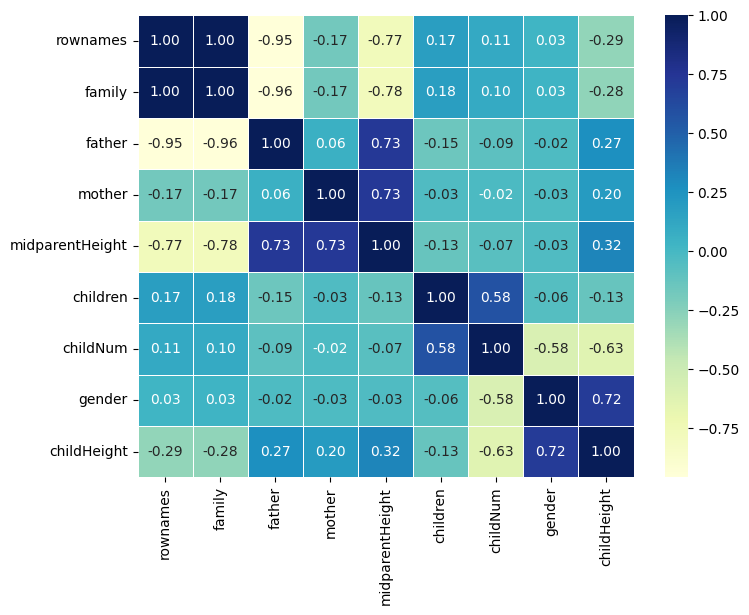

In [69]:
# Let's make out correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

In [70]:
df.head()

,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,1,78.5,67.0,75.43,4,1,2,73.2
1,2,1,78.5,67.0,75.43,4,2,1,69.2
2,3,1,78.5,67.0,75.43,4,3,1,69.0
3,4,1,78.5,67.0,75.43,4,4,1,69.0
4,5,2,75.5,66.5,73.66,4,1,2,73.5


In [71]:
# Create x and y
x = df.drop('childHeight', axis=1)
y = df['childHeight']

# Modelling

In [72]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((747, 8), (747,), (187, 8), (187,))

In [73]:
# Set the seed
np.random.seed(42)

# Initialize the Model
model = RandomForestRegressor()

# Fit the model
model.fit(x_train, y_train)

# Model score
model.score(x_test, y_test)

0.7229157425925717

In [74]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Evaluation Function

In [81]:
def rmsle(y_test, y_preds):
    """"
    Calculate root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create an evaluation function
def evaluate_model(model):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on a regresion model.
    """
    y_preds = model.predict(x_test)
    scores = {'Mean Absolute Error': mean_absolute_error(y_test, y_preds),
              'R^2': r2_score(y_test, y_preds),
              'Valid RMSLE': rmsle(y_test, y_preds)}

    return scores

In [82]:
evaluate_model(model)

{'Mean Absolute Error': 1.3556149732620326,
 'R^2': 0.7229157425925717,
 'Valid RMSLE': 0.025770226728575086}

# Hyperparameter Tuning with GridSearchCV

In [83]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [86]:
# Set the seed
np.random.seed(42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

# Set up the GridSearchCV
gs_model = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        cv=5,
                        verbose=True)

#Fit the grid search to the data
gs_model.fit(x_train, y_train)

# print the best parameters and best score
print(f'The Best Parameters are: {gs_model.best_params_}')
print(f'The Best Score is: {gs_model.best_score_}')

Fitting 5 folds for each of 144 candidates, totalling 720 fits
The Best Parameters are: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
The Best Score is: 0.7219137770282125


In [87]:
evaluate_model(gs_model)

{'Mean Absolute Error': 1.340659328996436,
 'R^2': 0.725467051817732,
 'Valid RMSLE': 0.025686269880929594}

# Hyperparameter Tuning with RandomizedSearchCV

In [88]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rs_model = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   cv=5,  # 5-fold cross-validation
                                   random_state=42)

# Fit RandomizedSearchCV
rs_model.fit(x_train, y_train)

# Best parameters found and best score
print(f'Best Parameters are: {rs_model.best_params_}')
print(f'Best Score is: {rs_model.best_score_}')

Best Parameters are: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Score is: 0.7227575618485027


In [89]:
evaluate_model(rs_model)

{'Mean Absolute Error': 1.3608859628489003,
 'R^2': 0.716576506414248,
 'Valid RMSLE': 0.02612606316833835}